<a href="https://colab.research.google.com/github/AlexKressner/Business_Intelligence/blob/main/ML_Klassifikation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Klassifikation, Beispiel Diabetes
Im nachfolgenden Beispiel werden wir ein ML-Verfahren einsetzen, um anhand von Untersuchungsergebnissen vorherzusagen, ob ein Patient Diabetes hat. Es handelt sich dabei um eine Klassifikationsproblem (Diabetes/ keine Diabetes). Wir verwenden einen Datensatz mit folgenden Informationen:
1. Anzahl Schwangerschaften
1. Glukosekonzentration nach Glukosetoleranztest
1. Blutdruck (mm Hg)
1. Dicke der Trizepshautfalte (mm)
1. Insulinwert (mu U/ml)
1. Body mass index
1. Diabetesvorbelastungsfunktion
1. Alter (Jahre)
1. Diabetes (0/1)

## 1 Daten laden

In [166]:
import pandas as pd

In [167]:
! git clone https://github.com/AlexKressner/Business_Intelligence

fatal: destination path 'Business_Intelligence' already exists and is not an empty directory.


In [168]:
path = "Business_Intelligence/Daten/ML_Klassifikation/"

In [169]:
# Daten laden
data = pd.read_csv(f"{path}diabetes.txt")

In [170]:
data.dtypes

,0
schwangerschaften,int64
glukose_konzentration,int64
blutdruck,int64
dicke_trizepshautfalte,int64
insulin_wert,int64
bmi,float64
diabetes_vorbelastung,float64
alter,int64
diabetes,int64


In [171]:
data.describe()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2 Datensatz in Features und Target teilen

Wie bereits zuvor müssen wir unterscheiden, was vorhergesagt werden soll (**Target**) und welche Merkmale dazu genutzt werden sollen (**Features**).

In [172]:
# Features, d.h. womit lässt sich Diabetes prognostizeren!
X = data.drop(columns="diabetes")
X.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [173]:
# Target, d.h. was soll prognostiziert werden!
y = data["diabetes"]
y.head()

,diabetes
0,1
1,0
2,1
3,0
4,1


## 2.2 Datensatz in Trainings- und Testmenge aufteilen
Erneut müssen wir die Daten aufteilen. Da wir ausschließlich mit numerischen Daten arbeiten, müssen wir keine Datenaufbereitung über `pd.get_dummies` vornehmen.

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
# X und y werden in Trainings- und Testmenge aufgeteilt, so dass die Testmenge 20% der vorhandenen Daten hat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [176]:
y_train.head()

,diabetes
468,1
478,0
107,0
304,0
515,1


In [177]:
X_train.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
468,8,120,0,0,0,30.0,0.183,38
478,8,126,74,38,75,25.9,0.162,39
107,4,144,58,28,140,29.5,0.287,37
304,3,150,76,0,0,21.0,0.207,37
515,3,163,70,18,105,31.6,0.268,28


## 2.3 Modell auswählen

Erneut verwenden wir das Verfahren `Random Forest`. Sie müssen allerdings darauf achten, dass Sie einen Random Forest zur Klassifikation importieren. Aus diesem Grund verwenden wir das Verfahren `RandomForestClassifier`. Für die Regressionaufgabe hatten wir das Verfahren `RandomForestRegressor` genutzt. Achten Sie auf diesen wichtigen Unterschied!

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
model = RandomForestClassifier()

## 2.4 Modell trainieren

Das Random Forest Verfahren versucht nun einen Zusammenhang zwischen den Features und dem Target zu lernen und minimiert dabei ein Fehlermaß. Letzteres misst den Grad der Fehlklassifikation. Beispiel für Fehlklassifikation: Das Modell prognostiziert Diabetes für einen Patienten, in der Realität liegt die Erkrankung aber nicht vor.

In [180]:
model.fit(X_train, y_train)

RandomForestClassifier()

## 2.5 Modell anwenden

Das ML-Verfahren erhält die Daten `X_test`, d.h. die Untersuchungsergebnisse mit den relevanten Merkmalen und wendet die gelernten Zusammenhänge zur Prognose des Targets an, d.h. dem Vorhandensein von Diabetes (0/1)!

In [181]:
X_test.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
51,1,101,50,15,36,24.2,0.526,26
378,4,156,75,0,0,48.3,0.238,32
27,1,97,66,15,140,23.2,0.487,22
579,2,197,70,99,0,34.7,0.575,62
86,13,106,72,54,0,36.6,0.178,45


In [182]:
y_pred = model.predict(X_test)

In [183]:
y_pred[:5]

array([0, 1, 0, 1, 0])

In [184]:
y_test.values[:5]

array([0, 1, 0, 1, 0])

In [185]:
pd.DataFrame({"Vorhersage":pd.Series(y_pred), "Beobachtung":pd.Series(y_test.values)},).head(10)

,Vorhersage,Beobachtung
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## 2.6 Modell evaluieren

Die Modellbewertung erfolgt bei der Klassifikation regelmäßg nach dem Kriterium der "Accuracy" (andere kommen aber auch zum Einsatz). Die Accuracy setzt die Anzahl der korrekten Klassifikation in das Verhältnis zur Anzahl aller Beobachtungen. Dementsprechend stellt sie den Anteil der korrekten Klassifikationen dar.

In [186]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [187]:
metrics.accuracy_score(y_test, y_pred) * 100

74.02597402597402

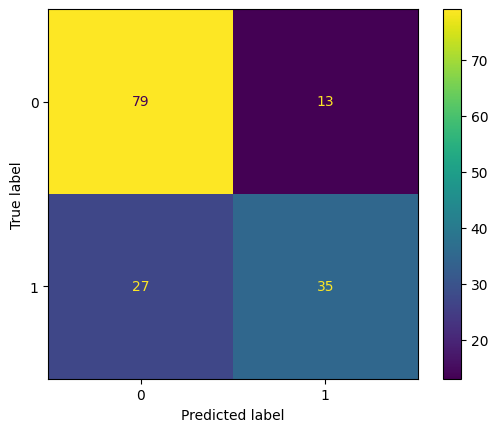

In [188]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

In [189]:
from sklearn.inspection import permutation_importance
import numpy as np

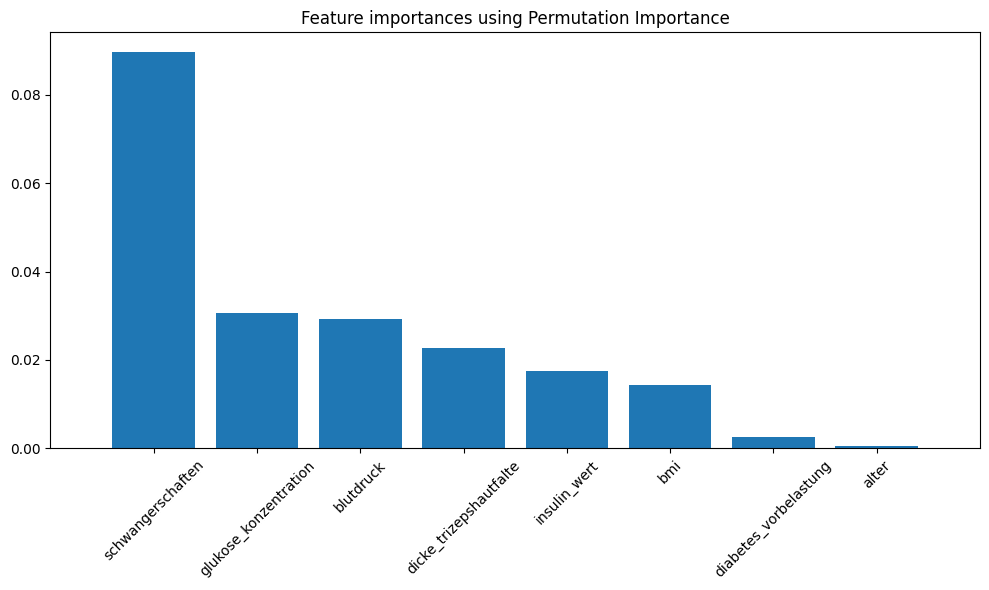

In [190]:
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the mean importance of each feature
importances = results.importances_mean

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances using Permutation Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Übungsaufgabe
Das Versinken der Titanic ist eines der berüchtigtsten Schiffsunglücke in der Geschichte.

Am 15. April 1912, während ihrer Jungfernfahrt, sank die weithin als „unsinkbar“ betrachtete RMS Titanic, nachdem sie mit einem Eisberg kollidiert war. Leider gab es nicht genügend Rettungsboote für alle an Bord, was zum Tod von 1502 der 2224 Passagiere und Besatzungsmitglieder führte.

Obwohl beim Überleben auch ein Element des Glücks eine Rolle spielte, scheint es, dass einige Gruppen von Menschen eine höhere Überlebenschance hatten als andere.

Erstellen Sie bitte ein Vorhersagemodell, das die Frage beantwortet: „Welche Art von Personen hatten eine höhere Überlebenschance?“ unter Verwendung von Passagierdaten (z.B. Name, Alter, Geschlecht, sozioökonomische Klasse usw.).

Die Daten finden Sie in der Datei `titanic.csv`.

In [191]:
# 1. Daten laden
data = pd.read_csv(f"{path}titanic.csv")

In [192]:
data.drop(columns=["Cabin","Embarked","PassengerId", "Name", "Ticket"], inplace=True)

In [193]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [194]:
# 2. Daten in Target & Feature aufteilen
X = data.drop(columns="Survived")
y = data["Survived"]

In [195]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [196]:
# 3. Dummies erstellen
X = pd.get_dummies(X)

In [197]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,False,True
1,1,38.0,1,0,71.2833,True,False
2,3,26.0,0,0,7.9250,True,False
3,1,35.0,1,0,53.1000,True,False
4,3,35.0,0,0,8.0500,False,True


In [198]:
# 4. Train- und Testdaten definieren
# X und y werden in Trainings- und Testmenge aufgeteilt, so dass die Testmenge 20% der vorhandenen Daten hat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [199]:
# 5. Modell auswählen und trainieren
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
# 6. Modell evaluieren
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 1])

In [201]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[:5]

array([[0.95966667, 0.04033333],
       [0.73      , 0.27      ],
       [0.97333333, 0.02666667],
       [0.99      , 0.01      ],
       [0.38      , 0.62      ]])

In [202]:
metrics.accuracy_score(y_test, y_pred) * 100

79.3296089385475

In [203]:
data["Survived"].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


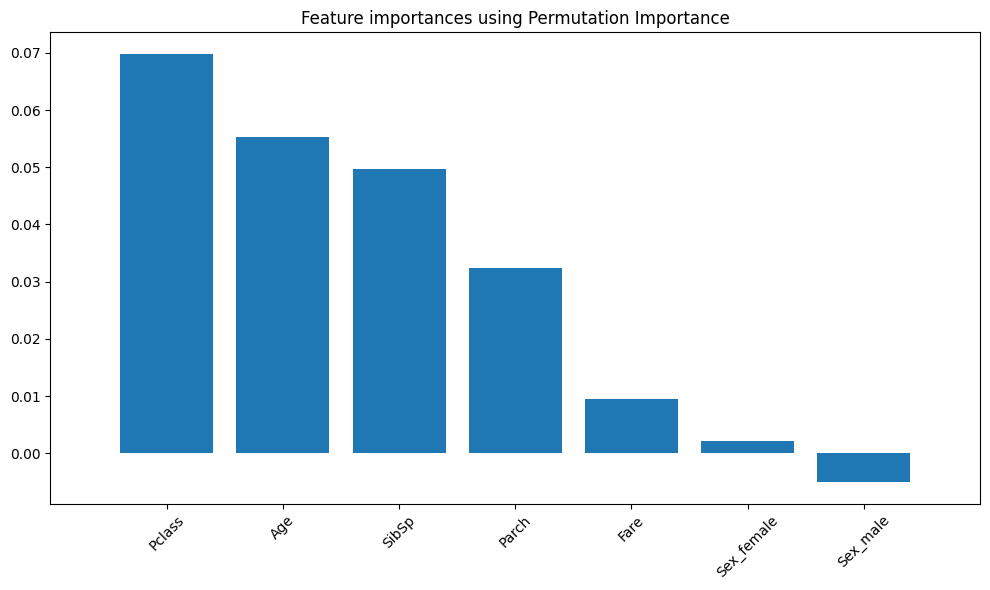

In [204]:
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the mean importance of each feature
importances = results.importances_mean

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances using Permutation Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()